# **Лабораторна робота 3**

Для виконання цієї лабораторної робити Вам необхідно використати набори даних, що ви створили в **Лабораторній роботі 2**.

**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Завдання 1.** Ви маєте набір даних, який складається з двох лінійно роздільних класів. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 1:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати розподіл даних та межі класифікації кожної моделі;
- провести аналіз отриманих результатів, виявляючи, яка модель найкраще підходить для цього набору даних та чому.

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
import seaborn as sns


df_two_classes = pd.read_csv('../lab2/task1_df.csv')

MSE train: 0.027, test: 0.027
R^2 train: 0.891, test: 0.892


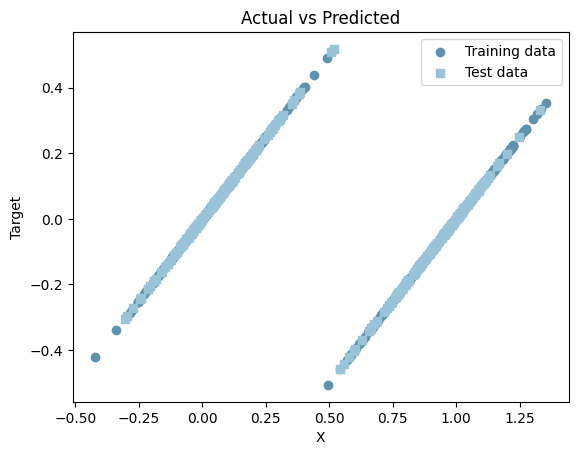

In [123]:
X = df_two_classes[['x', 'y']]  
y = df_two_classes['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f'MSE train: {mse_train:.3f}, test: {mse_test:.3f}')
print(f'R^2 train: {r2_train:.3f}, test: {r2_test:.3f}')


plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='#5f93ad', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='#98c3d9', marker='s', label='Test data')
plt.xlabel('X')
plt.ylabel('Target')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

k=1 99.86% (+/- 0.43)
k=2 99.86% (+/- 0.43)
k=3 99.86% (+/- 0.43)
k=4 99.86% (+/- 0.43)
k=5 99.86% (+/- 0.43)
k=6 99.86% (+/- 0.43)
k=7 99.71% (+/- 0.57)
k=8 99.71% (+/- 0.57)
k=9 99.86% (+/- 0.43)
k=10 99.86% (+/- 0.43)
k=11 99.86% (+/- 0.43)
k=12 99.71% (+/- 0.57)
k=13 99.71% (+/- 0.57)
k=14 99.71% (+/- 0.57)
k=15 99.71% (+/- 0.57)
k=16 99.71% (+/- 0.57)
k=17 99.86% (+/- 0.43)
k=18 99.86% (+/- 0.43)
k=19 99.86% (+/- 0.43)
k=20 99.86% (+/- 0.43)
k=21 99.86% (+/- 0.43)
k=22 99.86% (+/- 0.43)
k=23 99.86% (+/- 0.43)
k=24 99.86% (+/- 0.43)
The optimal number of neighbors is 1 with 99.86% accuracy
Accuracy on test data: 99.33%
Classification Report (test):
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       150
         1.0       0.99      1.00      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



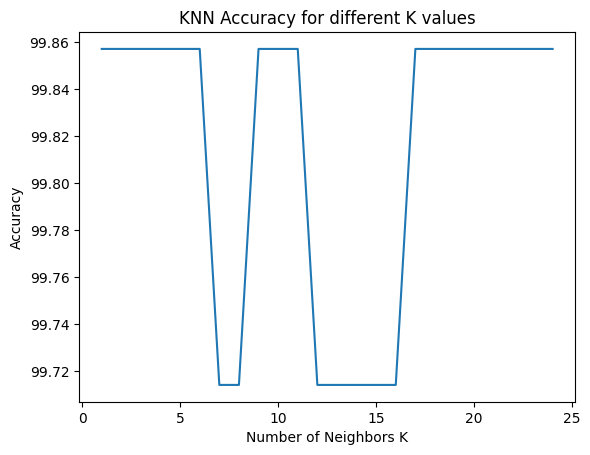

In [124]:
X = df_two_classes[['x', 'y']]  
y = df_two_classes['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neighbors = np.arange(1, 25)  
cv_scores = []
k_fold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean() * 100)
    print(f"k={k} {scores.mean()*100:.2f}% (+/- {scores.std()*100:.2f})")


optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is {optimal_k} with {max(cv_scores):.2f}% accuracy")


knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test data: {accuracy_test * 100:.2f}%')

print(f'Classification Report (test):')
print(classification_report(y_test, y_test_pred))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different K values')
plt.show()

In [125]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)

[[148   2]
 [  0 150]]
99.0


In [126]:
X = df_two_classes[['x', 'y']]  
y = df_two_classes['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test data: {accuracy_test * 100:.2f}%')

print('Classification Report (test):')
print(classification_report(y_test, y_test_pred))

importances = rf.feature_importances_
feature_names = X.columns

Accuracy on test data: 99.00%
Classification Report (test):
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       150
         1.0       0.98      1.00      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



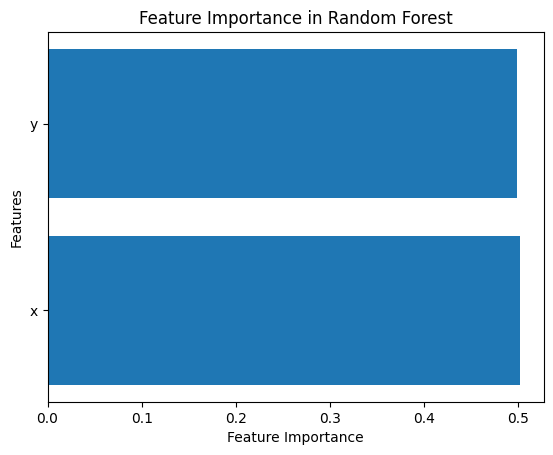

In [127]:

plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest')
plt.show()

**Аналіз отриманих результатів**:

Після тренування кількох моделей на першому наборі даних, що є лінійно роздільним, я застосувала не лише лінійно роздільні алгоритми. Серед випробуваних моделей були Linear Regression (89.1% Accuracy), KNN (99.86% Accuracy) та Random Forest (99.00% Accuracy).
Як бачимо, усі моделі продемонстрували практично ідеальні результати. Це свідчить про те, що для даного набору з двома лінійно роздільними класами підходить будь-яка з цих моделей у базовій конфігурації.

**Завдання 2.** Ви маєте набір даних, що містить три класи, які частково перетинаються. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 2:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- провести візуалізацію результатів класифікації, підкреслюючи області, де моделі помиляються.
- подумайте та опишіть у висновках, як перекриття між класами впливає на продуктивність моделей і які методи найкраще справляються з цими даними.


In [128]:
df_three_classes = pd.read_csv('../lab2/three_classes_sample.csv')
X = df_three_classes[['x', 'y']]  
y = df_three_classes['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test data: {accuracy_test * 100:.2f}%')

print('Classification Report (test):')
print(classification_report(y_test, y_test_pred))

importances = rf.feature_importances_
feature_names = X.columns

Accuracy on test data: 98.15%
Classification Report (test):
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99        83
         1.0       0.99      0.96      0.98       111
         2.0       0.96      1.00      0.98        76

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270



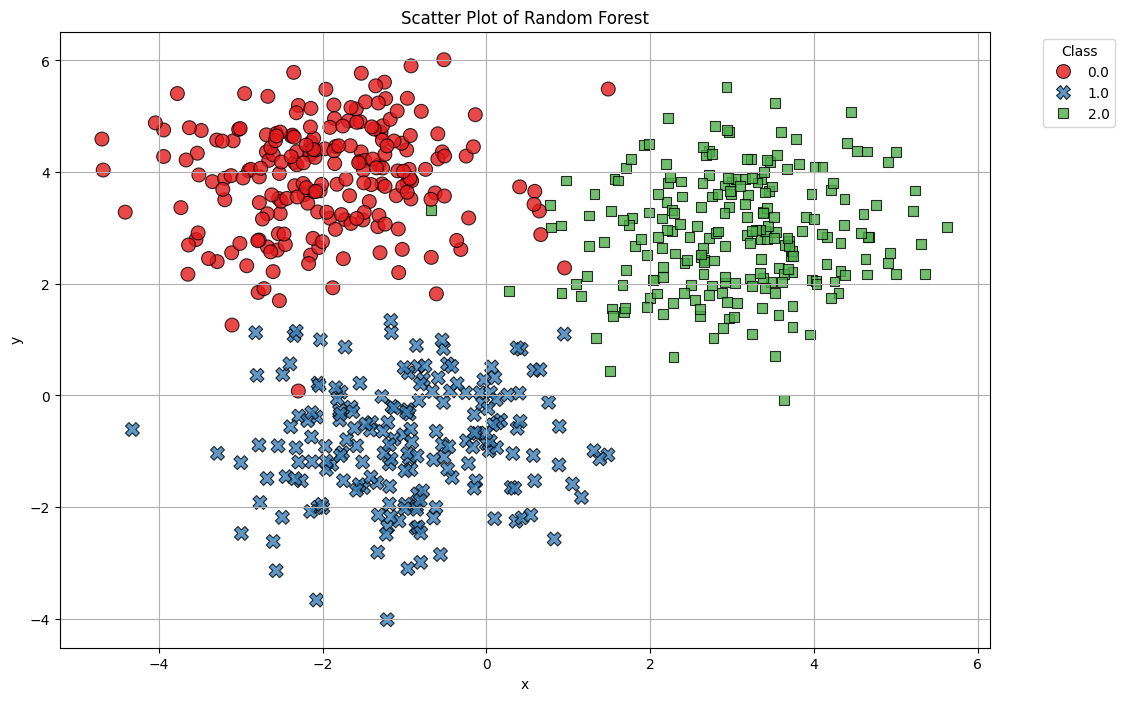

In [129]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x=X_train['x'], y=X_train['y'], hue=y_train, palette='Set1', style=y_train, s=100, alpha=0.8, edgecolor='k')

plt.title('Scatter Plot of Random Forest')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

k=1 98.41% (+/- 1.23)
k=2 97.78% (+/- 2.03)
k=3 98.57% (+/- 1.32)
k=4 98.41% (+/- 1.88)
k=5 98.25% (+/- 2.18)
k=6 98.10% (+/- 2.54)
k=7 98.25% (+/- 1.80)
k=8 98.10% (+/- 2.11)
k=9 98.25% (+/- 1.11)
k=10 98.10% (+/- 1.38)
k=11 98.25% (+/- 1.50)
k=12 98.10% (+/- 2.11)
k=13 98.10% (+/- 1.85)
k=14 98.10% (+/- 1.85)
k=15 98.41% (+/- 1.59)
k=16 98.10% (+/- 1.71)
k=17 98.10% (+/- 1.71)
k=18 98.10% (+/- 1.71)
k=19 98.25% (+/- 1.50)
k=20 98.25% (+/- 1.50)
k=21 98.25% (+/- 1.50)
k=22 98.10% (+/- 1.71)
k=23 98.10% (+/- 1.71)
k=24 98.10% (+/- 1.71)
The optimal number of neighbors is 3 with 98.57% accuracy
Accuracy on test data: 98.15%
Classification Report (test):
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        83
         1.0       0.98      0.97      0.98       111
         2.0       0.96      1.00      0.98        76

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg 

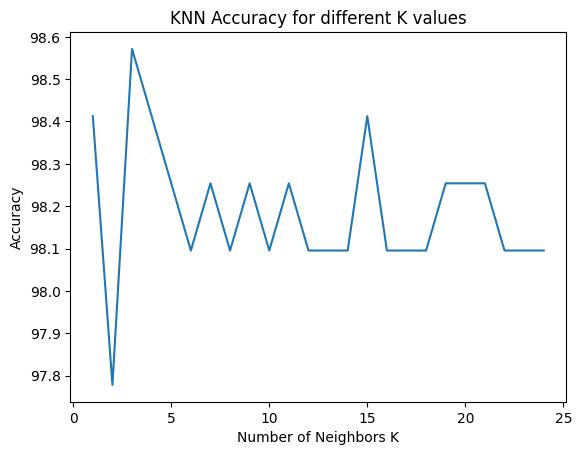

In [130]:
X = df_three_classes[['x', 'y']]  
y = df_three_classes['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neighbors = np.arange(1, 25)  
cv_scores = []
k_fold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean() * 100)
    print(f"k={k} {scores.mean()*100:.2f}% (+/- {scores.std()*100:.2f})")


optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is {optimal_k} with {max(cv_scores):.2f}% accuracy")


knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test data: {accuracy_test * 100:.2f}%')

print(f'Classification Report (test):')
print(classification_report(y_test, y_test_pred))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different K values')
plt.show()

In [131]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)

[[ 81   2   0]
 [  0 108   3]
 [  0   0  76]]
98.0


Accuracy on test data: 98.52%
Classification Report (test):
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        83
         1.0       0.99      0.97      0.98       111
         2.0       0.96      1.00      0.98        76

    accuracy                           0.99       270
   macro avg       0.98      0.99      0.99       270
weighted avg       0.99      0.99      0.99       270



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


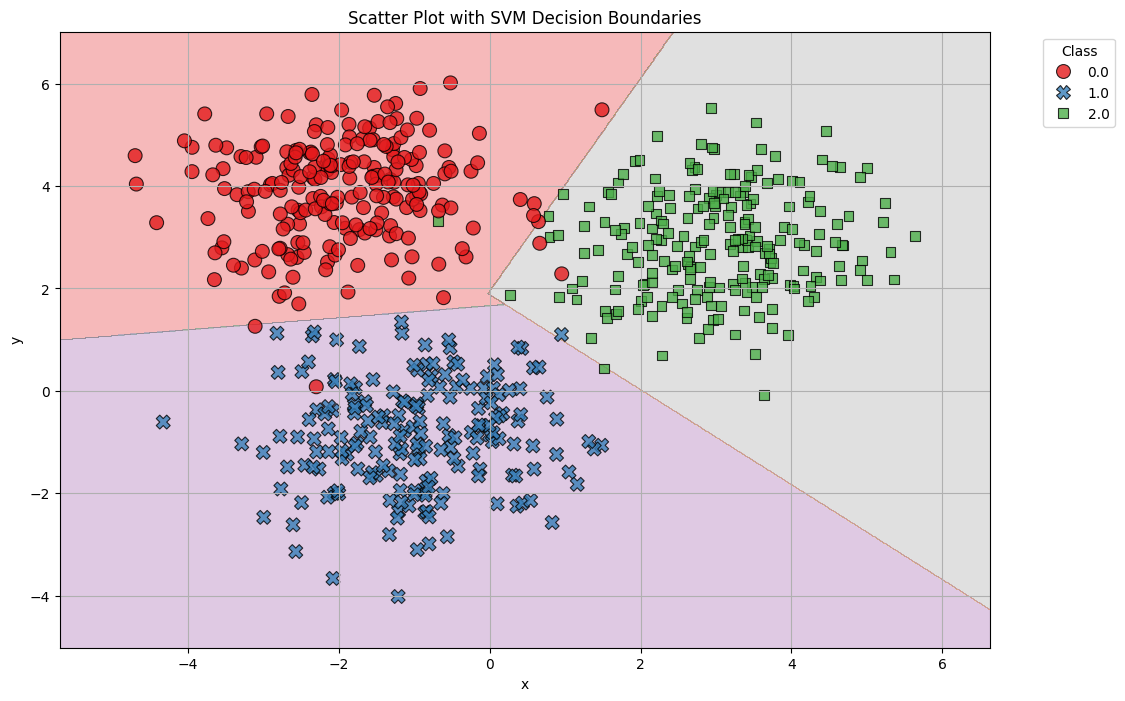

In [132]:
X = df_three_classes[['x', 'y']]  
y = df_three_classes['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

y_test_pred = svm.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test data: {accuracy_test * 100:.2f}%')
print('Classification Report (test):')
print(classification_report(y_test, y_test_pred))

plt.figure(figsize=(12, 8))

x_min, x_max = X_train['x'].min() - 1, X_train['x'].max() + 1
y_min, y_max = X_train['y'].min() - 1, X_train['y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')

sns.scatterplot(x=X_train['x'], y=X_train['y'], hue=y_train, palette='Set1', style=y_train, s=100, alpha=0.8, edgecolor='k')

plt.title('Scatter Plot with SVM Decision Boundaries')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Аналіз отриманих результатів**:

Після проведення базового тренування моелей з набором даних, що містить три нелінійно роздільні класи, я вирішила протестувати кілька різних алгоритмів. Для цього застосувала такі моделі, як SVM (98.52% Accuracy), KNN (98.57% Accuracy) та Random Forest (98.15% Accuracy). \
Незважаючи на нелінійність класів, усі моделі показали майже ідеальну точність. Це свідчить про те, що навіть у складнішому випадку можна використовувати будь-яку з цих моделей у їх стандартній конфігурації й досягти високої продуктивності.


**Завдання 3.** Ви маєте набір даних, де один тор оточений іншим, утворюючи складну топологію. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 3:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- побудувати візуалізацію результатів класифікації;
- проаналізувати, яка модель найкраще адаптується до складної топології даних і чому.

Accuracy on test data: 99.67%
Classification Report (test):
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00       150
         1.0       0.99      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



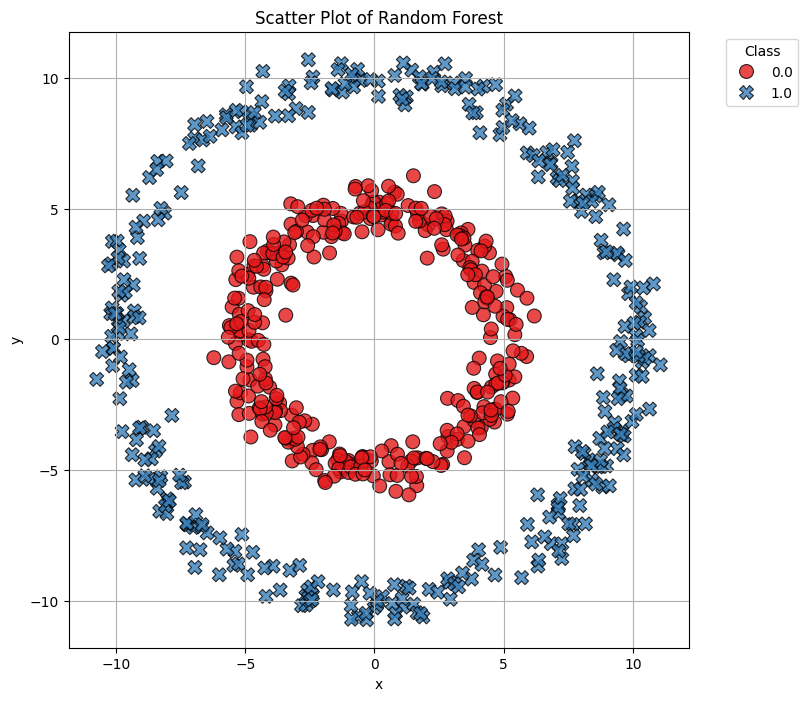

In [133]:
df_tor_in_tor= pd.read_csv('../lab2/tor_in_tor.csv')
X = df_tor_in_tor[['x', 'y']]  
y = df_tor_in_tor['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test data: {accuracy_test * 100:.2f}%')

print('Classification Report (test):')
print(classification_report(y_test, y_test_pred))

importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 8))

sns.scatterplot(x=X_train['x'], y=X_train['y'], hue=y_train, palette='Set1', style=y_train, s=100, alpha=0.8, edgecolor='k')

plt.title('Scatter Plot of Random Forest')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

k=1 100.00% (+/- 0.00)
k=2 100.00% (+/- 0.00)
k=3 100.00% (+/- 0.00)
k=4 100.00% (+/- 0.00)
k=5 100.00% (+/- 0.00)
k=6 100.00% (+/- 0.00)
k=7 100.00% (+/- 0.00)
k=8 100.00% (+/- 0.00)
k=9 100.00% (+/- 0.00)
k=10 100.00% (+/- 0.00)
k=11 100.00% (+/- 0.00)
k=12 100.00% (+/- 0.00)
k=13 100.00% (+/- 0.00)
k=14 100.00% (+/- 0.00)
k=15 100.00% (+/- 0.00)
k=16 100.00% (+/- 0.00)
k=17 100.00% (+/- 0.00)
k=18 100.00% (+/- 0.00)
k=19 100.00% (+/- 0.00)
k=20 100.00% (+/- 0.00)
k=21 100.00% (+/- 0.00)
k=22 100.00% (+/- 0.00)
k=23 100.00% (+/- 0.00)
k=24 100.00% (+/- 0.00)
The optimal number of neighbors is 1 with 100.00% accuracy
Accuracy on test data: 100.00%
Classification Report (test):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       150
         1.0       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.

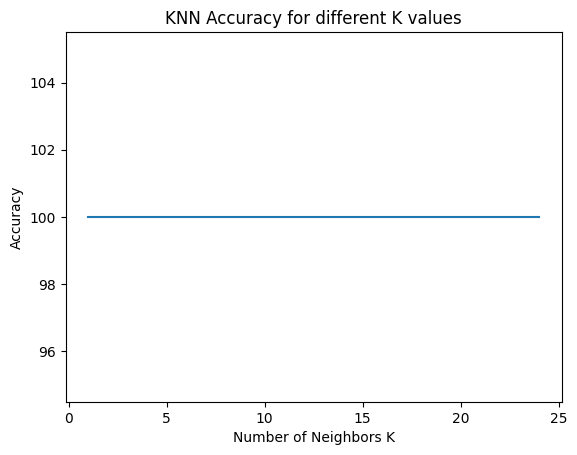

In [134]:
X = df_tor_in_tor[['x', 'y']]
y = df_tor_in_tor['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neighbors = np.arange(1, 25)  
cv_scores = []
k_fold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean() * 100)
    print(f"k={k} {scores.mean()*100:.2f}% (+/- {scores.std()*100:.2f})")


optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is {optimal_k} with {max(cv_scores):.2f}% accuracy")


knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test data: {accuracy_test * 100:.2f}%')

print(f'Classification Report (test):')
print(classification_report(y_test, y_test_pred))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different K values')
plt.show()

In [135]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)

[[150   0]
 [  0 150]]
100.0


Accuracy on test data: 99.67%
Classification Report (test):
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       150
         1.0       1.00      0.99      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



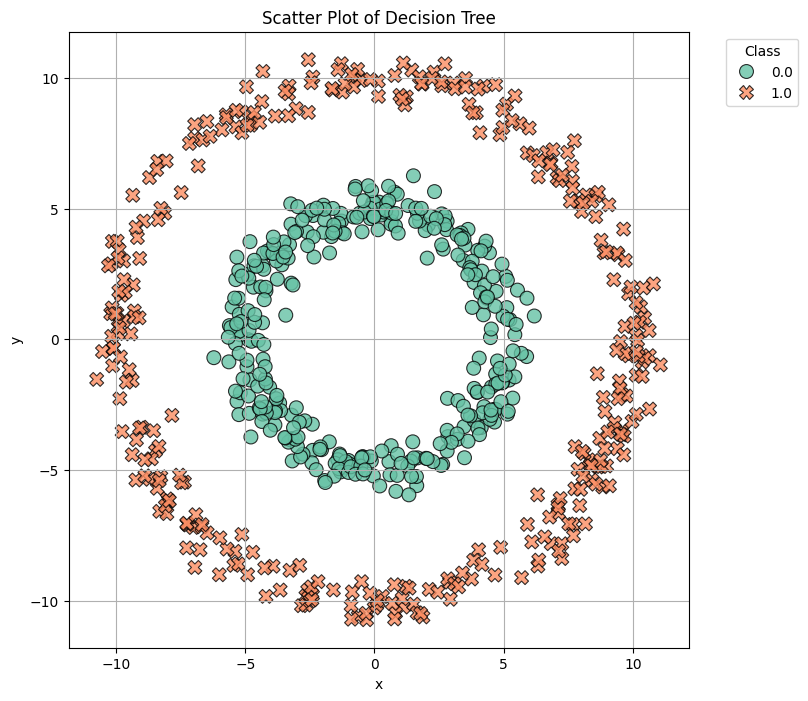

In [136]:
X = df_tor_in_tor[['x', 'y']]
y = df_tor_in_tor['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_test_pred = dt.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test data: {accuracy_test * 100:.2f}%')

print('Classification Report (test):')
print(classification_report(y_test, y_test_pred))

plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_train['x'], y=X_train['y'], hue=y_train, palette='Set2', style=y_train, s=100, alpha=0.8, edgecolor='k')

plt.title('Scatter Plot of Decision Tree')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Аналіз отриманих результатів**:

Цього разу я вирішила використати дві схожі моделі — **Decision Tree** та **Random Forest**. Хоча ці алгоритми мають однакову основу, є ключова різниця: **Decision Tree** — це одиночне дерево рішень, тоді як **Random Forest** складається з багатьох дерев, що працюють разом для покращення точності. Крім того, я протестувала **KNN** для порівняння.

Результати після навчання вийшли такими:

- **Random Forest**: точність 99.67%
- **Decision Tree**: точність 99.67%
- **KNN**: точність 100%

Варто звернути увагу на результат **KNN**, який показав 100% точності. Хоч це виглядає круто проте, такий результат мені здається підозрілим і свідчить про перенавчання. Модель могла занадто точно підлаштуватись під тренувальні дані, що в реальних умовах може погіршити її продуктивність на нових вибірках.

У результаті **Random Forest** та **Decision Tree** продемонстрували більш стабільні й надійні результати.

**Завдання 4.** Ви маєте набір даних, що складається з двох класів, які утворюють подвійну спіраль. Вам необхідно застосувати під цей набір даних мінімум **3  моледі машинного навчання** для класифікації цих даних та оцінити їх продуктивність.

**Пояснення до завдання 4:**

- обрати 3 моделі для класифікації даних та навчити їх;
- оцінити їх продуктивність за допомогою трьох метрик точності;
- візуалізувати дані та межі класифікації кожної моделі для оцінки їх ефективності.
- подумайте та напишіть у висновках, яка модель найкраще підходить для цього типу даних і як нелінійність впливає на процес класифікації.

Accuracy on test data: 98.67%
Classification Report (test):
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99       150
         1.0       0.98      0.99      0.99       150

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



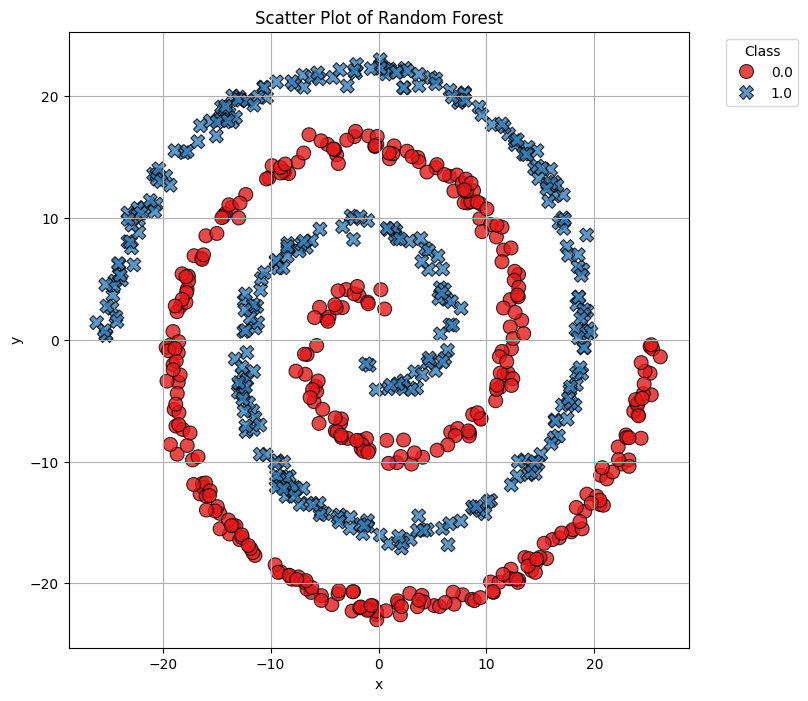

In [137]:
two_spirales_df = pd.read_csv('../lab2/two_spirales.csv')

X = two_spirales_df[['x', 'y']]  
y = two_spirales_df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test data: {accuracy_test * 100:.2f}%')

print('Classification Report (test):')
print(classification_report(y_test, y_test_pred))

importances = rf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(8, 8))

sns.scatterplot(x=X_train['x'], y=X_train['y'], hue=y_train, palette='Set1', style=y_train, s=100, alpha=0.8, edgecolor='k')

plt.title('Scatter Plot of Random Forest')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

k=2 100.00% (+/- 0.00)
k=3 100.00% (+/- 0.00)
k=4 100.00% (+/- 0.00)
k=5 100.00% (+/- 0.00)
k=6 100.00% (+/- 0.00)
k=7 100.00% (+/- 0.00)
k=8 100.00% (+/- 0.00)
k=9 100.00% (+/- 0.00)
k=10 100.00% (+/- 0.00)
k=11 100.00% (+/- 0.00)
k=12 100.00% (+/- 0.00)
k=13 100.00% (+/- 0.00)
k=14 100.00% (+/- 0.00)
k=15 100.00% (+/- 0.00)
k=16 100.00% (+/- 0.00)
k=17 100.00% (+/- 0.00)
k=18 100.00% (+/- 0.00)
k=19 100.00% (+/- 0.00)
k=20 100.00% (+/- 0.00)
k=21 100.00% (+/- 0.00)
k=22 99.71% (+/- 0.86)
k=23 99.57% (+/- 0.91)
k=24 99.43% (+/- 1.14)
The optimal number of neighbors is 2 with 100.00% accuracy
Accuracy on test data: 100.00%
Classification Report (test):
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       150
         1.0       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



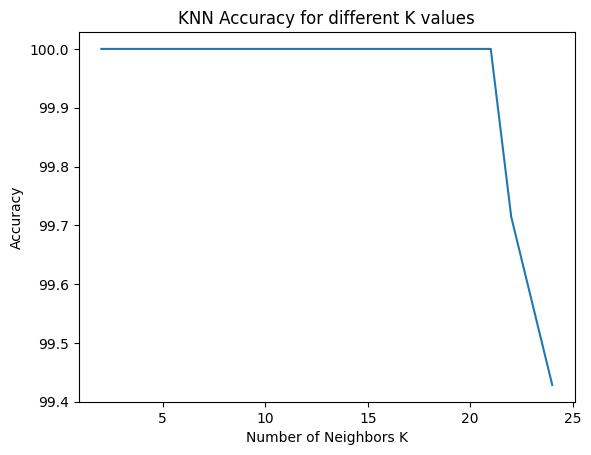

In [141]:
X = two_spirales_df[['x', 'y']]
y = two_spirales_df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

neighbors = np.arange(2, 25)  
cv_scores = []
k_fold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', p=2, metric='euclidean')
    scores = model_selection.cross_val_score(knn, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_scores.append(scores.mean() * 100)
    print(f"k={k} {scores.mean()*100:.2f}% (+/- {scores.std()*100:.2f})")


optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print(f"The optimal number of neighbors is {optimal_k} with {max(cv_scores):.2f}% accuracy")


knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

y_test_pred = knn.predict(X_test)

accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test data: {accuracy_test * 100:.2f}%')

print(f'Classification Report (test):')
print(classification_report(y_test, y_test_pred))

plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for different K values')
plt.show()

In [139]:
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
knnpred = knn.predict(X_test)

print(confusion_matrix(y_test, knnpred))
print(round(accuracy_score(y_test, knnpred),2)*100)

[[150   0]
 [  0 150]]
100.0


Accuracy on test data: 98.33%
Classification Report (test):
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98       150
         1.0       0.98      0.99      0.98       150

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



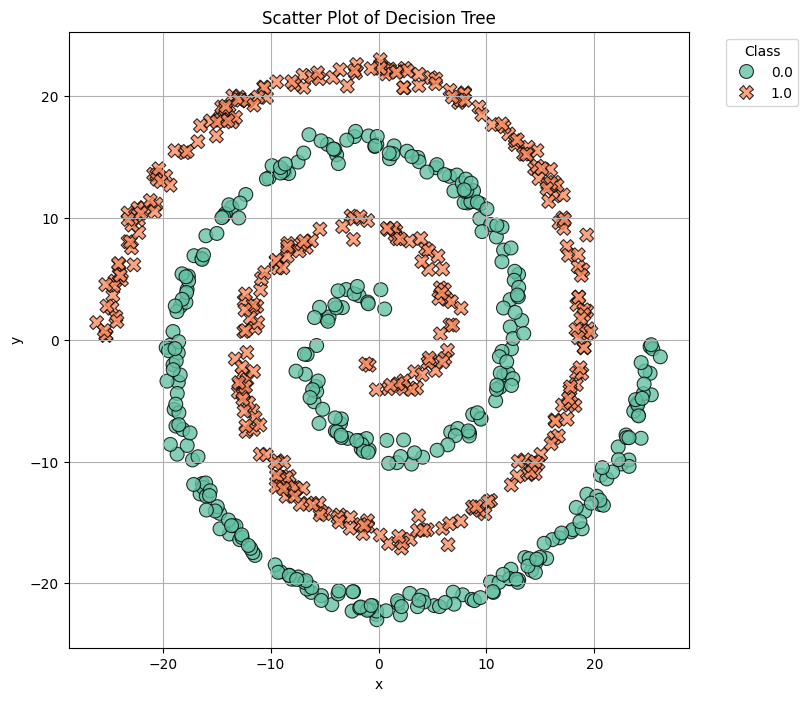

In [140]:
X = two_spirales_df[['x', 'y']]
y = two_spirales_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_test_pred = dt.predict(X_test)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f'Accuracy on test data: {accuracy_test * 100:.2f}%')

print('Classification Report (test):')
print(classification_report(y_test, y_test_pred))

plt.figure(figsize=(8, 8))
sns.scatterplot(x=X_train['x'], y=X_train['y'], hue=y_train, palette='Set2', style=y_train, s=100, alpha=0.8, edgecolor='k')

plt.title('Scatter Plot of Decision Tree')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(title='Class', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

**Аналіз отриманих результатів**:

Цього разу я випробувала моделі на наборі даних з двома класами, які утворюють спіралі. Така структура є досить складною для моделей, оскільки класи закручуються навколо один одного. Для цього я знову використала ті ж самі моделі: **Random Forest (98.67% Accuracy)**, **Decision Tree (98.33% Accuracy)** та **KNN (100% Accuracy)**.

Як і минулого разу, **KNN** знову показав 100% точність. Знову ж таки це швидше за все, свідчить про перенавчання моделі. Але **Random Forest** та **Decision Tree** показали більш збалансовані результати. Незважаючи на складність датасету, вони досить добре впоралися із завданням.